<a href="https://colab.research.google.com/github/Akshu2410/Batch2_Churn_Modeling_On_Telecom_Data/blob/main/Akshari_Mane/Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Telecom Churn Prediction**

## *Data Cleaning and EDA*

**Step 1 : Data Loading and Basic Preprocessing**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df_churnData = pd.read_csv('Churn_ Data.csv')

In [ ]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
df_churnData.head()

First few rows of the dataset:


,s6.new.rev.p2.m2,s1.new.rev.m1,s3.og.rev.4db.p5,s3.new.rev.4db.p5,s4.usg.ins.p2,s4.og.unq.any.p2,s2.rch.val.p6,s1.og.rev.all.m1,s8.new.rev.p6,s4.loc.ic.ins.p1,...,prop.og.mou.tot.mou.all.p6,prop.i2i.og.mou.p6,s4.loc.ic.ins.p2,s4.std.ic.ins.l14,s4.low.blnc.ins.p4,s3.og.rev.all.m2,s3.new.rev.m2,prop.og.mou.any.p6,prop.loc.i2i.mou.og.mou.p3,s3.rev.p1
0,-0.76,88.0482,3.106604,3.754955,4,14,39.29,57.320,-0.17,1,...,0.454642,0.497397,4,0,9,6.02,8.20,46.465636,0.609456,0.22
1,-0.98,67.5039,3.094574,5.550865,1,2,21.67,38.700,-0.32,3,...,0.343190,0.767617,6,0,20,3.66,8.10,34.525456,1.000000,0.38
2,-0.98,33.9248,2.324016,2.438114,2,3,30.00,15.320,-0.05,3,...,0.101838,0.619034,6,1,19,4.33,4.36,10.298451,0.699592,0.11
3,-0.92,82.6780,2.630749,2.858961,2,3,50.00,51.956,-0.18,4,...,0.066602,0.437088,7,2,11,3.40,3.53,6.670783,0.086617,5.18
4,-0.97,96.8379,2.674316,2.912397,3,2,22.50,66.886,0.01,4,...,0.219821,0.585977,6,1,14,3.85,3.87,21.998905,0.683105,0.10


In [ ]:
# Shape of the data
print("Shape of the data:", df_churnData.shape)

Shape of the data: (25000, 111)


In [ ]:
# Checking the datatype
print("Data types:")
print(df_churnData.dtypes.value_counts())

Data types:
float64    80
int64      31
Name: count, dtype: int64


In [ ]:
# Checking the Statistical summary.
df_churnData.describe()

,s6.new.rev.p2.m2,s1.new.rev.m1,s3.og.rev.4db.p5,s3.new.rev.4db.p5,s4.usg.ins.p2,s4.og.unq.any.p2,s2.rch.val.p6,s1.og.rev.all.m1,s8.new.rev.p6,s4.loc.ic.ins.p1,...,prop.og.mou.tot.mou.all.p6,prop.i2i.og.mou.p6,s4.loc.ic.ins.p2,s4.std.ic.ins.l14,s4.low.blnc.ins.p4,s3.og.rev.all.m2,s3.new.rev.m2,prop.og.mou.any.p6,prop.loc.i2i.mou.og.mou.p3,s3.rev.p1
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,...,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,-0.003730,281.073083,4.890003,7.070194,5.460080,28.532520,72.208906,218.517937,-0.028327,3.254720,...,0.538407,0.485523,5.731280,1.797320,8.382160,8.008660,12.540182,53.594165,0.483975,9.951366
std,2.727916,276.075983,4.212452,6.318992,2.184444,28.061435,67.921490,231.321064,0.354573,1.193271,...,0.209203,0.271146,1.936848,3.048943,8.961016,6.152429,11.540611,21.408486,0.292349,17.648128
min,-1.000000,0.000000,0.000000,0.000833,0.000000,0.000000,0.000000,0.000000,-5.090000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.580000,101.563800,2.367288,3.318825,5.000000,9.000000,33.000000,74.420000,-0.160000,3.000000,...,0.394227,0.274034,5.000000,0.000000,1.000000,4.207500,6.167500,39.378142,0.251304,1.970000
50%,-0.170000,204.859600,3.729944,5.231268,7.000000,21.000000,52.260000,151.168500,-0.020000,4.000000,...,0.539354,0.476759,7.000000,0.000000,5.000000,6.345000,9.350000,53.976203,0.477621,5.380000
75%,0.280000,370.711650,5.993342,8.395736,7.000000,39.000000,89.852500,284.265000,0.110000,4.000000,...,0.682695,0.694104,7.000000,2.000000,14.000000,9.830000,14.620000,68.312416,0.716538,11.400000
max,316.860000,5702.924300,153.221695,170.200441,7.000000,622.000000,2249.000000,3767.565000,5.000000,4.000000,...,1.000000,1.000000,7.000000,14.000000,30.000000,171.780000,386.480000,100.000000,1.000000,585.500000


In [ ]:
# Display the last few rows of the dataset
print("Last few rows of the dataset:")
df_churnData.tail()

Last few rows of the dataset:


,s6.new.rev.p2.m2,s1.new.rev.m1,s3.og.rev.4db.p5,s3.new.rev.4db.p5,s4.usg.ins.p2,s4.og.unq.any.p2,s2.rch.val.p6,s1.og.rev.all.m1,s8.new.rev.p6,s4.loc.ic.ins.p1,...,prop.og.mou.tot.mou.all.p6,prop.i2i.og.mou.p6,s4.loc.ic.ins.p2,s4.std.ic.ins.l14,s4.low.blnc.ins.p4,s3.og.rev.all.m2,s3.new.rev.m2,prop.og.mou.any.p6,prop.loc.i2i.mou.og.mou.p3,s3.rev.p1
24995,0.21,132.0365,2.652236,2.857739,5,8,26.67,123.396,-0.16,4,...,0.145831,0.200151,7,0,18,3.57,3.83,14.896154,0.328027,0.76
24996,0.80,77.0154,3.763389,5.012503,2,8,27.88,62.140,0.19,4,...,0.529829,0.169835,7,0,18,6.89,7.70,55.156230,0.288006,12.74
24997,0.01,148.8337,3.823940,4.334250,6,10,10.00,98.900,-0.03,2,...,0.327245,0.407944,3,0,12,6.63,7.48,33.222018,0.235918,8.07
24998,0.17,1012.4398,14.667580,14.579567,7,67,42.92,734.005,0.70,4,...,0.824671,0.889239,7,1,1,19.36,22.26,82.549378,0.952962,21.21
24999,-1.00,275.3530,5.134579,5.954062,1,1,53.50,250.340,-0.48,4,...,0.377281,0.609046,7,0,18,5.42,8.02,38.590040,1.000000,0.00


In [ ]:
# Display basic information about the dataset
print("Dataset information:")
df_churnData.info()

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 111 entries, s6.new.rev.p2.m2 to s3.rev.p1
dtypes: float64(80), int64(31)
memory usage: 21.2 MB


**Step 2 : Data Cleaning and Exploratory Data Analysis**

Removing Duplicate Records


---



In [ ]:
# Check duplicate records
df_churnData.duplicated().sum()

0

In [ ]:
# Remove duplicate records
df_churnData.drop_duplicates(inplace=True)
print("Number of records after removing duplicates:", df_churnData.shape[0])

Number of records after removing duplicates: 25000


Removing Unique Value Variable


---

In [ ]:
# Remove variables with a unique value

# Identify columns with only one unique value
single_unique_cols = [col for col in df_churnData.columns if df_churnData[col].nunique() == 1]

# Remove those columns from the DataFrame
df_churnData = df_churnData.drop(single_unique_cols, axis=1)

# Display the remaining columns
print("Remaining columns after removing single-unique-value columns:", df_churnData.shape[1])

Remaining columns after removing single-unique-value columns: 111


Removing Zero Variance Variable


---



In [ ]:
# Remove zero variance variables
zero_var_cols = df_churnData.columns[df_churnData.var() == 0]
df_churnData.drop(zero_var_cols, axis=1, inplace=True)
print("Number of columns after removing zero variance variables:", df_churnData.shape[1])


Number of columns after removing zero variance variables: 111


Missing Value Treatment

---



In [ ]:
# Handling missing values
print("Missing values in the dataset:")
print(df_churnData.isnull().sum())

Missing values in the dataset:
s6.new.rev.p2.m2              0
s1.new.rev.m1                 0
s3.og.rev.4db.p5              0
s3.new.rev.4db.p5             0
s4.usg.ins.p2                 0
                             ..
s3.og.rev.all.m2              0
s3.new.rev.m2                 0
prop.og.mou.any.p6            0
prop.loc.i2i.mou.og.mou.p3    0
s3.rev.p1                     0
Length: 111, dtype: int64


In [ ]:
# remove records if NA's are less than 5% and variables if NA's are 50% and more

# Calculate the threshold for 5% missing values
threshold_5 = 0.05 * df_churnData.shape[0]

# Remove records with less than 5% missing values
df_churnData = df_churnData.dropna(thresh=threshold_5, axis=1)

# Calculate the threshold for 50% missing values
threshold_50 = 0.5 * df_churnData.shape[1]

# Remove variables with 50% or more missing values
df_churnData = df_churnData.dropna(thresh=threshold_50, axis=0)

# Display the remaining columns
print("Number of records after removing records with less than 5% missing values:", df_churnData.shape[0])
print("Number of Variables after removing columns with 50% or more missing values:", df_churnData.shape[1])


Number of records after removing records with less than 5% missing values: 25000
Number of Variables after removing columns with 50% or more missing values: 111


In [ ]:
# Fill missing values with the mean for numerical columns and the mode for categorical columns
for column in df_churnData.columns:
    if df_churnData[column].dtype == 'object':
        df_churnData[column].fillna(df_churnData[column].mode()[0], inplace=True)
    else:
        df_churnData[column].fillna(df_churnData[column].mean(), inplace=True)

In [ ]:
# Verify that there are no missing values
print("Missing values after imputation:")
print(df_churnData.isnull().sum())

Missing values after imputation:
s6.new.rev.p2.m2              0
s1.new.rev.m1                 0
s3.og.rev.4db.p5              0
s3.new.rev.4db.p5             0
s4.usg.ins.p2                 0
                             ..
s3.og.rev.all.m2              0
s3.new.rev.m2                 0
prop.og.mou.any.p6            0
prop.loc.i2i.mou.og.mou.p3    0
s3.rev.p1                     0
Length: 111, dtype: int64


Convert datatype of variables which are misclassified

---



In [ ]:
# Checking Misclassified Datatype
for column in df_churnData.columns:
    if df_churnData[column].dtype not in ['float64', 'int64']:
        print(f"Non-Numeric datatype: {column}")
else:
    print("All datatypes are either float or int")

All datatypes are either float or int


**Outlier Treatment**

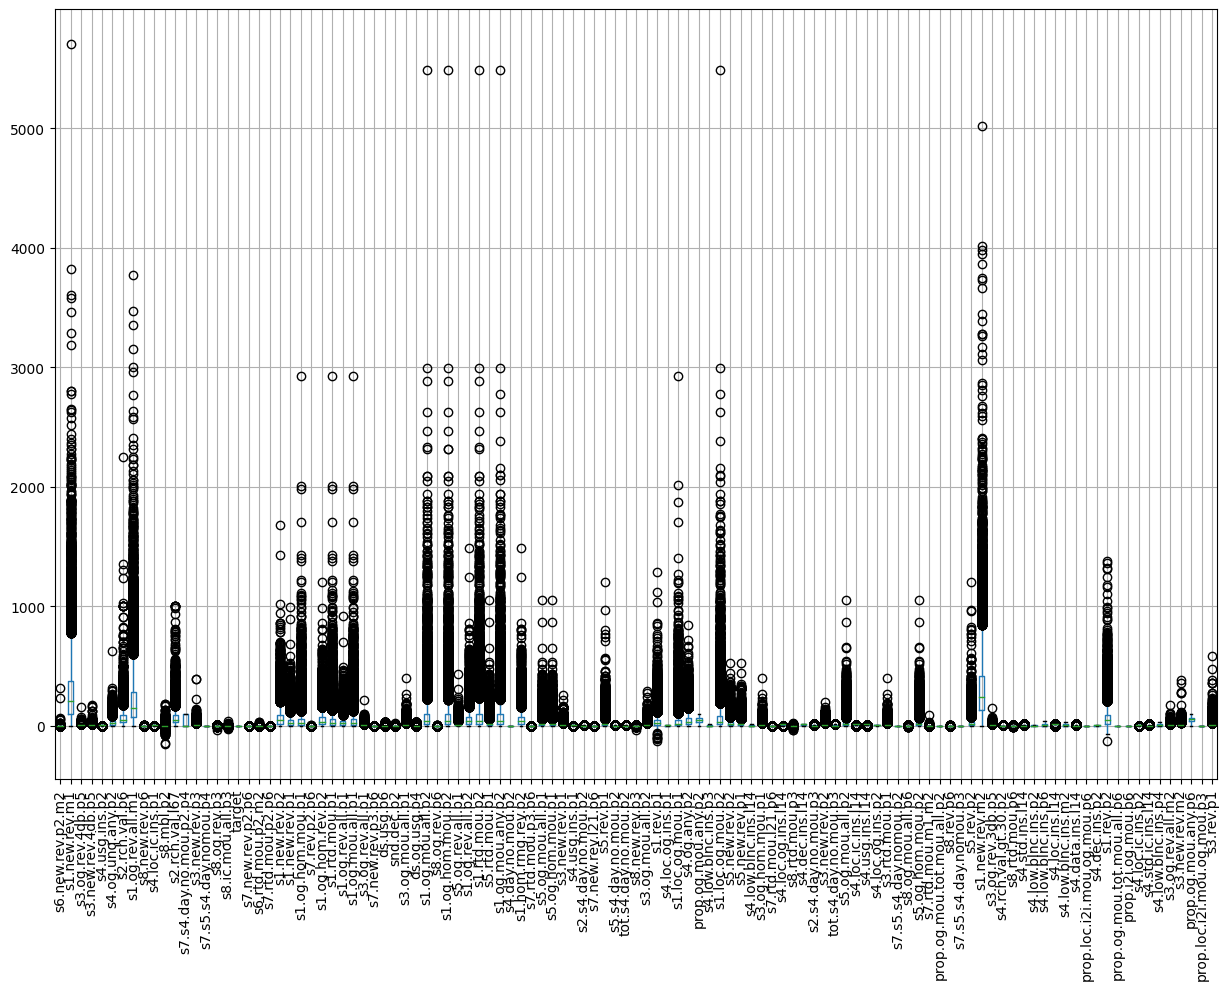

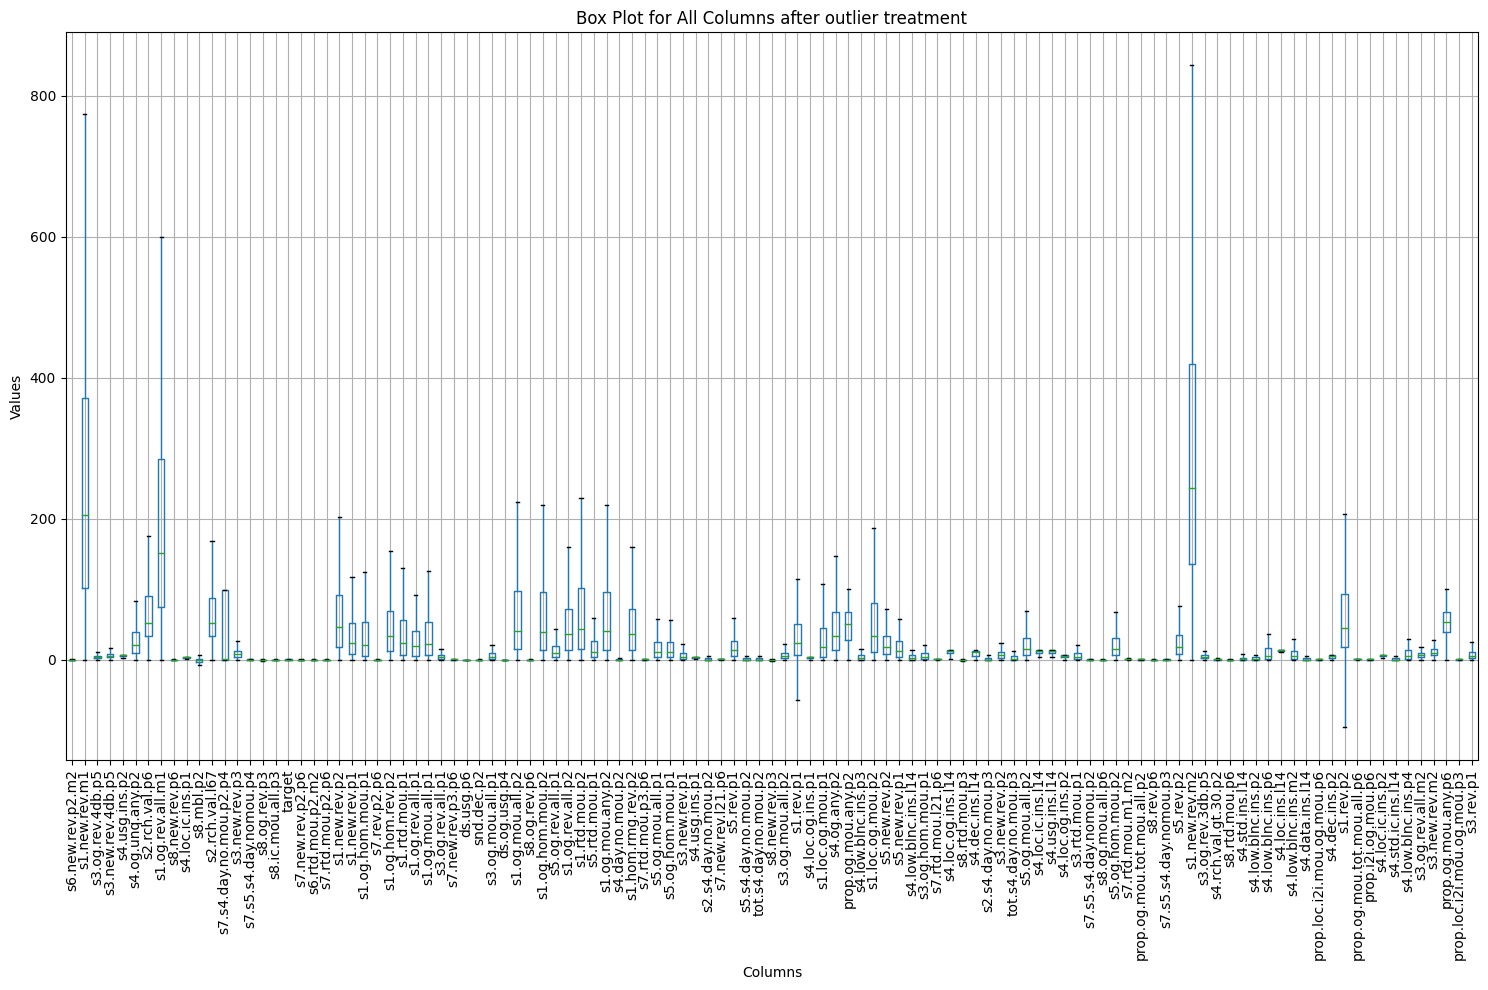

In [ ]:
# Using boxplot to visualize outliers
plt.figure(figsize=(15, 10))
df_churnData.boxplot()
plt.xticks(rotation=90)
plt.show()

numerical_cols = df_churnData.select_dtypes(include=['float', 'int']).columns

# Treat outliers using IQR method
for col in numerical_cols:
    Q1 = df_churnData[col].quantile(0.25)
    Q3 = df_churnData[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_churnData[col] = np.clip(df_churnData[col], lower_bound, upper_bound)

# Visualize the data after outlier treatment
plt.figure(figsize=(15, 10))
df_churnData.boxplot()
plt.xticks(rotation=90)
plt.title('Box Plot for All Columns after outlier treatment')
plt.ylabel('Values')
plt.xlabel('Columns')
plt.tight_layout()
plt.show()

Removing Highly correlated variables

---



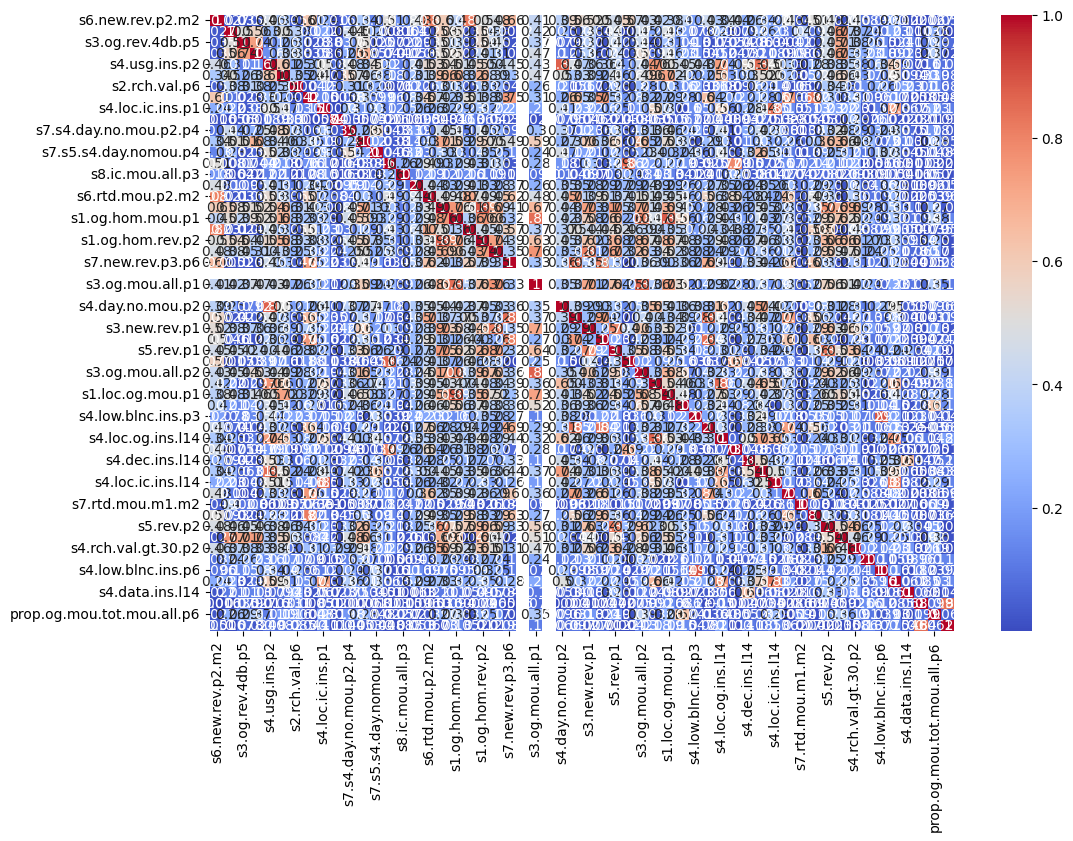

Number of columns after removing highly correlated variables: 56


In [ ]:
# Creating a correlation matrix
corr_matrix = df_churnData.corr().abs()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Select the upper triangle of the correlation matrix
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.9
high_corr_vars = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]

# Drop highly correlated variables
df_churnData.drop(columns=high_corr_vars, inplace=True)

# Print the number of columns remaining
print("Number of columns after removing highly correlated variables:", df_churnData.shape[1])

In [ ]:
#Printing the final result of our preprocessing
print("Final shape of the data:", df_churnData.shape)

Final shape of the data: (25000, 56)


Multicollineraity (VIF > 5)

---



In [ ]:
# prompt: multicollineraity VIF>5

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select numerical columns for VIF calculation
numerical_cols = df_churnData.select_dtypes(include=['float', 'int']).columns

# Calculate VIF for each numerical column
vif_data = pd.DataFrame()
vif_data["Variable"] = numerical_cols
vif_data["VIF"] = [variance_inflation_factor(df_churnData[numerical_cols].values, i) for i in range(len(numerical_cols))]

# Identify variables with VIF greater than 5
high_vif_vars = vif_data[vif_data['VIF'] > 5]['Variable'].tolist()

# Drop variables with high VIF
df_churnData.drop(columns=high_vif_vars, inplace=True)

# Print the number of columns remaining
print("Number of columns after removing variables with high VIF:", df_churnData.shape[1])


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Number of columns after removing variables with high VIF: 11


# *Model Selection*


**Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

# Define X and y
X = df_churnData.drop('target', axis=1)
y = df_churnData['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# *Random Forest Classifier*

**Step 1 : Base Model Training and Evaluation**

Random Forest Model Accuracy: 0.766
Random Forest Model Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84      3437
           1       0.67      0.49      0.57      1563

    accuracy                           0.77      5000
   macro avg       0.73      0.69      0.70      5000
weighted avg       0.76      0.77      0.75      5000

Random Forest Model training and evaluation complete.
Random Forest Confusion Matrix:


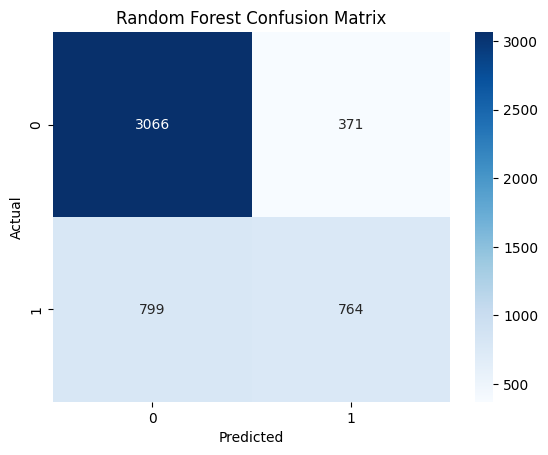

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the Random Forest model
rf_model = RandomForestClassifier(n_estimators=400, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred)
rf_report = classification_report(y_test, y_pred)

print(f"Random Forest Model Accuracy: {rf_accuracy}")
print(f"Random Forest Model Classification Report:\n{rf_report}")

print("Random Forest Model training and evaluation complete.")

# Plot Confusion Matrix for Random Forest
print("Random Forest Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

**Step 2 : Hyperparameter Tuning and Model Training**

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Best parameters found: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 50, 'bootstrap': True}
Hyperparameter tuning complete.
Best Model Accuracy: 0.7674
Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84      3437
           1       0.68      0.48      0.56      1563

    accuracy                           0.77      5000
   macro avg       0.74      0.69      0.70      5000
weighted avg       0.76      0.77      0.75      5000



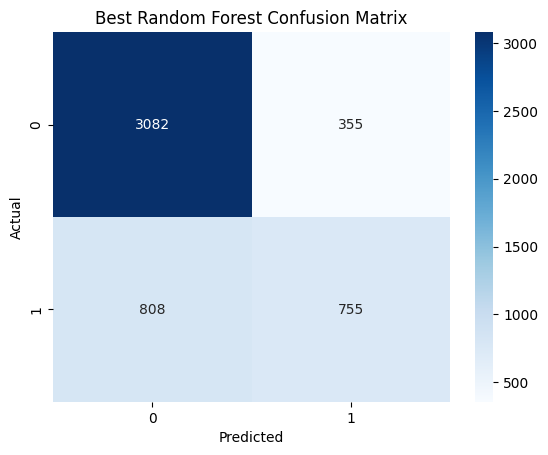

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Use a smaller subset of the training data for hyperparameter tuning
X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, test_size=0.9, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,n_iter=50, cv=4, n_jobs=-1, verbose=2, random_state=42, scoring='accuracy')

# Fit RandomizedSearchCV to the small subset of data
random_search.fit(X_train_small, y_train_small)

# Get the best parameters
best_params = random_search.best_params_

# Print the best parameters
print(f"Best parameters found: {best_params}")
print("Hyperparameter tuning complete.")

# Train the model with the best parameters on the entire training set
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Predict on the test set
y_pred_best = best_rf.predict(X_test)

# Evaluate the model
rf_accuracy_best = accuracy_score(y_test, y_pred_best)
rf_report_best = classification_report(y_test, y_pred_best)

print(f"Best Model Accuracy: {rf_accuracy_best}")
print(f"Best Model Classification Report:\n{rf_report_best}")

# Compute confusion matrix
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

# Plot the Confusion Matrix
sns.heatmap(conf_matrix_best, annot=True, fmt="d", cmap="Blues", xticklabels=best_rf.classes_, yticklabels=best_rf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Best Random Forest Confusion Matrix")
plt.show()

# *Logistic Regression*

**Step 1 : Base Model Training and Evaluation**

Logistic Regression Model Accuracy: 0.7516
Logistic Regression Model Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.91      0.83      3437
           1       0.67      0.40      0.50      1563

    accuracy                           0.75      5000
   macro avg       0.72      0.66      0.67      5000
weighted avg       0.74      0.75      0.73      5000

Logistic Regression Model training and evaluation complete.
Logistic Regression Confusion Matrix:


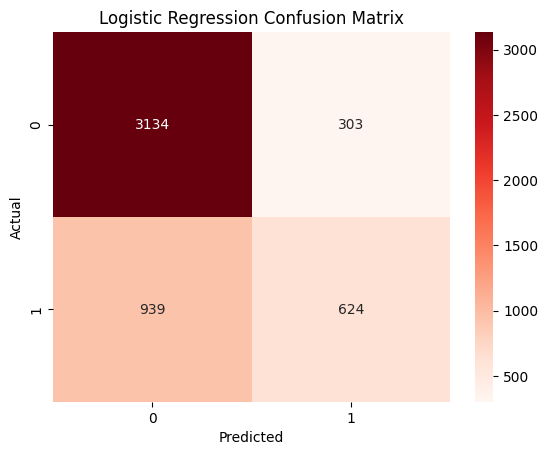

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train the Logistic Regression model
lr_model = LogisticRegression(max_iter=10000, random_state=42)
lr_model.fit(X_train, y_train)

# Predict on the test set
lr_y_pred = lr_model.predict(X_test)

# Evaluate the Logistic Regression model
lr_accuracy = accuracy_score(y_test, lr_y_pred)
lr_report = classification_report(y_test, lr_y_pred)

print(f"Logistic Regression Model Accuracy: {lr_accuracy}")
print(f"Logistic Regression Model Classification Report:\n{lr_report}")

print("Logistic Regression Model training and evaluation complete.")

# Plot Confusion Matrix for Logistic Regression
print("Logistic Regression Confusion Matrix:")
lr_conf_matrix = confusion_matrix(y_test, lr_y_pred)
sns.heatmap(lr_conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

**Step 2 : Hyperparameter Tuning and Model Training**

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters for Logistic Regression: {'solver': 'saga', 'penalty': 'l2', 'C': 2.06913808111479}
Best Logistic Regression Model Accuracy: 0.752
Best Logistic Regression Model Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.91      0.83      3437
           1       0.67      0.40      0.50      1563

    accuracy                           0.75      5000
   macro avg       0.72      0.66      0.67      5000
weighted avg       0.74      0.75      0.73      5000

Logistic Regression Model training and evaluation complete.
Logistic Regression Confusion Matrix:


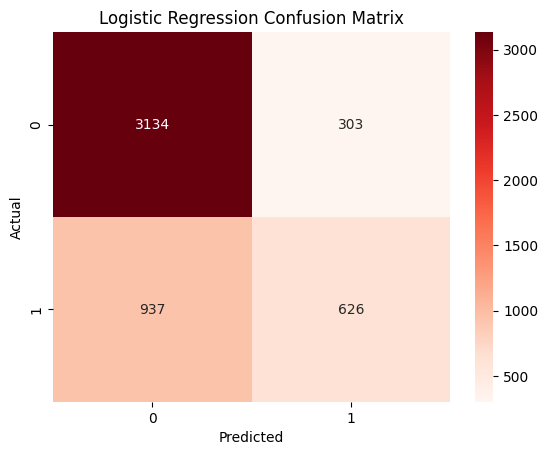

In [ ]:
# Define the parameter distribution for Logistic Regression
param_dist_lr = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-2, 2, 20),
    'solver': ['liblinear', 'saga'],
}

# Initialize and fit RandomizedSearchCV for Logistic Regression
random_search_lr = RandomizedSearchCV(
    LogisticRegression(max_iter=2000, random_state=42),
    param_distributions=param_dist_lr,
    n_iter=50,
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=1
)
random_search_lr.fit(X_train, y_train)

# Best parameters for Logistic Regression
best_params_lr = random_search_lr.best_params_
print(f"Best parameters for Logistic Regression: {best_params_lr}")

# Train the model with the best parameters on the entire training set
best_lr_model = LogisticRegression(**best_params_lr, max_iter=1000, random_state=42)
best_lr_model.fit(X_train, y_train)

# Predict on the test set
lr_y_pred_best = best_lr_model.predict(X_test)

# Evaluate the model
lr_accuracy_best = accuracy_score(y_test, lr_y_pred_best)
lr_report_best = classification_report(y_test, lr_y_pred_best)

print(f"Best Logistic Regression Model Accuracy: {lr_accuracy_best}")
print(f"Best Logistic Regression Model Classification Report:\n{lr_report_best}")

print("Logistic Regression Model training and evaluation complete.")

# Plot Confusion Matrix for Logistic Regression
print("Logistic Regression Confusion Matrix:")
lr_conf_matrix_best = confusion_matrix(y_test, lr_y_pred_best)
sns.heatmap(lr_conf_matrix_best, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# *Decision Tree*

**Step 1 : Base Model Training and Evaluation**

Decision Tree Model Accuracy: 0.6624
Decision Tree Model Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.75      0.75      3437
           1       0.46      0.48      0.47      1563

    accuracy                           0.66      5000
   macro avg       0.61      0.61      0.61      5000
weighted avg       0.67      0.66      0.66      5000

Decision Tree Model training and evaluation complete.
Decision Tree Confusion Matrix:


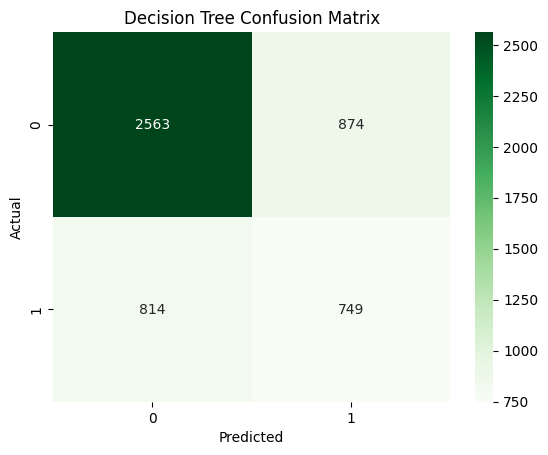

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
dt_y_pred = dt_model.predict(X_test)

# Evaluate the Decision Tree model
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_report = classification_report(y_test, dt_y_pred)

print(f"Decision Tree Model Accuracy: {dt_accuracy}")
print(f"Decision Tree Model Classification Report:\n{dt_report}")

print("Decision Tree Model training and evaluation complete.")

# Plot Confusion Matrix for Decision Tree
print("Decision Tree Confusion Matrix:")
dt_conf_matrix = confusion_matrix(y_test, dt_y_pred)
sns.heatmap(dt_conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

**Step 2 : Hyperparameter Tuning and Model Training**

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 7}
Best Decision Tree Model Accuracy: 0.7516
Best Decision Tree Model Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      3437
           1       0.62      0.52      0.56      1563

    accuracy                           0.75      5000
   macro avg       0.71      0.69      0.70      5000
weighted avg       0.74      0.75      0.74      5000

Decision Tree Model training and evaluation complete.
Decision Tree Confusion Matrix:


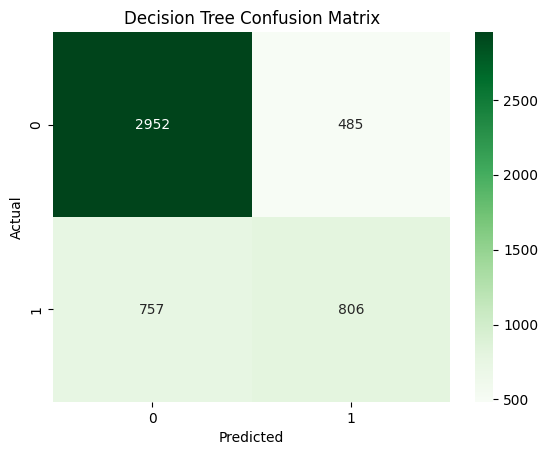

In [ ]:
from scipy.stats import randint

# Define the parameter distribution for Decision Tree
param_dist_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None] + list(np.arange(10, 51, 10)),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
}

# Initialize and fit RandomizedSearchCV for Decision Tree
random_search_dt = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), param_distributions=param_dist_dt, n_iter=50, cv=5, n_jobs=-1, random_state=42, verbose=1)
random_search_dt.fit(X_train, y_train)

# Best parameters for Decision Tree
best_params_dt = random_search_dt.best_params_
print(f"Best parameters for Decision Tree: {best_params_dt}")

# Train the model with the best parameters on the entire training set
best_dt_model = DecisionTreeClassifier(**best_params_dt, random_state=42)
best_dt_model.fit(X_train, y_train)

# Predict on the test set
dt_y_pred_best = best_dt_model.predict(X_test)

# Evaluate the model
dt_accuracy_best = accuracy_score(y_test, dt_y_pred_best)
dt_report_best = classification_report(y_test, dt_y_pred_best)

print(f"Best Decision Tree Model Accuracy: {dt_accuracy_best}")
print(f"Best Decision Tree Model Classification Report:\n{dt_report_best}")

print("Decision Tree Model training and evaluation complete.")

# Plot Confusion Matrix for Decision Tree
print("Decision Tree Confusion Matrix:")
dt_conf_matrix_best = confusion_matrix(y_test, dt_y_pred_best)
sns.heatmap(dt_conf_matrix_best, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

# *Result*

In [ ]:
import pandas as pd
from tabulate import tabulate

# Define the accuracy results for each model
data = {
    'Model': ['Random Forest', 'Logistic Regression', 'Decision Tree'],
    'Normal Model Accuracy': [rf_accuracy, lr_accuracy, dt_accuracy],
    'Hypertuned Model Accuracy': [rf_accuracy_best, lr_accuracy_best, dt_accuracy_best]
}

# Create a DataFrame
results_df = pd.DataFrame(data)

# Display the DataFrame
print(tabulate(results_df, headers='keys', tablefmt='pretty'))

+---+---------------------+-----------------------+---------------------------+
|   |        Model        | Normal Model Accuracy | Hypertuned Model Accuracy |
+---+---------------------+-----------------------+---------------------------+
| 0 |    Random Forest    |         0.766         |          0.7674           |
| 1 | Logistic Regression |        0.7516         |           0.752           |
| 2 |    Decision Tree    |        0.6624         |          0.7516           |
+---+---------------------+-----------------------+---------------------------+


# *Model Evaluation*

**Step 1 : Plotting RoC and AuC Graph**

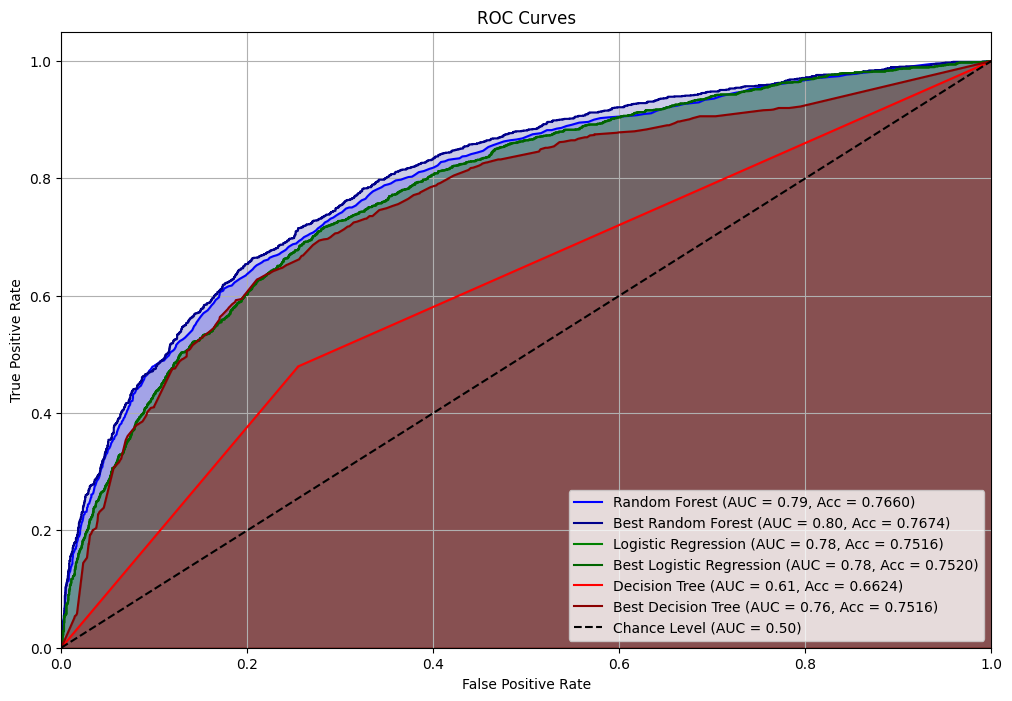

In [ ]:
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt

# Function to calculate ROC curve and AUC
def calculate_roc_auc(model, X_test, y_test):
    probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    accuracy = accuracy_score(y_test, model.predict(X_test))
    return fpr, tpr, roc_auc, accuracy

# Calculate ROC curve, AUC, and accuracy for each model
rf_fpr, rf_tpr, rf_auc, rf_acc = calculate_roc_auc(rf_model, X_test, y_test)
rf_fpr_best, rf_tpr_best, rf_auc_best, rf_acc_best = calculate_roc_auc(best_rf, X_test, y_test)

lr_fpr, lr_tpr, lr_auc, lr_acc = calculate_roc_auc(lr_model, X_test, y_test)
lr_fpr_best, lr_tpr_best, lr_auc_best, lr_acc_best = calculate_roc_auc(best_lr_model, X_test, y_test)

dt_fpr, dt_tpr, dt_auc, dt_acc = calculate_roc_auc(dt_model, X_test, y_test)
dt_fpr_best, dt_tpr_best, dt_auc_best, dt_acc_best = calculate_roc_auc(best_dt_model, X_test, y_test)

# Plot the ROC curves and fill the area under the curve
plt.figure(figsize=(12, 8))

# Random Forest
plt.plot(rf_fpr, rf_tpr, color='blue', label=f'Random Forest (AUC = {rf_auc:.2f}, Acc = {rf_acc:.4f})')
plt.fill_between(rf_fpr, rf_tpr, color='blue', alpha=0.2)

# Best Random Forest
plt.plot(rf_fpr_best, rf_tpr_best, color='darkblue', label=f'Best Random Forest (AUC = {rf_auc_best:.2f}, Acc = {rf_acc_best:.4f})')
plt.fill_between(rf_fpr_best, rf_tpr_best, color='darkblue', alpha=0.2)

# Logistic Regression
plt.plot(lr_fpr, lr_tpr, color='green', label=f'Logistic Regression (AUC = {lr_auc:.2f}, Acc = {lr_acc:.4f})')
plt.fill_between(lr_fpr, lr_tpr, color='green', alpha=0.2)

# Best Logistic Regression
plt.plot(lr_fpr_best, lr_tpr_best, color='darkgreen', label=f'Best Logistic Regression (AUC = {lr_auc_best:.2f}, Acc = {lr_acc_best:.4f})')
plt.fill_between(lr_fpr_best, lr_tpr_best, color='darkgreen', alpha=0.2)

# Decision Tree
plt.plot(dt_fpr, dt_tpr, color='red', label=f'Decision Tree (AUC = {dt_auc:.2f}, Acc = {dt_acc:.4f})')
plt.fill_between(dt_fpr, dt_tpr, color='red', alpha=0.2)

# Best Decision Tree
plt.plot(dt_fpr_best, dt_tpr_best, color='darkred', label=f'Best Decision Tree (AUC = {dt_auc_best:.2f}, Acc = {dt_acc_best:.4f})')
plt.fill_between(dt_fpr_best, dt_tpr_best, color='darkred', alpha=0.3)

# Plotting the diagonal line
plt.plot([0, 1], [0, 1], 'k--', label='Chance Level (AUC = 0.50)')

# Formatting plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()